## Description of the data 

1. Problem Definition
In our case, we will be exploring a binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data

**features** 

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) `(= the predicted attribute)`

## Preparing the tools

In [4]:
# Exploratory data analysis tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# The plots are going to appear inside the notebook
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve,roc_auc_score


### Load the data

In [5]:
heart_disease=pd.read_csv("heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
heart_disease.shape

(303, 14)

### Data exploration

In [7]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# the number of each class in the target column
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

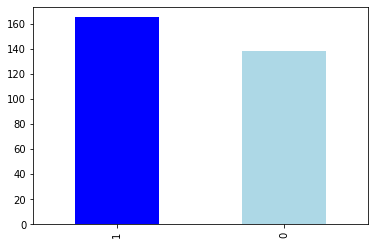

In [9]:
heart_disease["target"].value_counts().plot(kind="bar",color=["blue","lightblue"])


In [10]:
#make sure there is no missing data
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Compare target column with sex column 
pd.crosstab(heart_disease.sex,heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


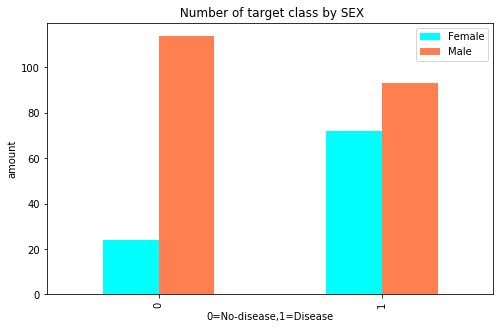

In [11]:
import matplotlib.pyplot as plt
fig=pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar",
                                                         figsize=(8,5),
                                                         color=["aqua","coral"])
plt.title(" Number of target class by SEX")
plt.xlabel("0=No-disease,1=Disease")
plt.ylabel("amount")
plt.legend(["Female","Male"]) 

In [12]:
#Correlation Matrix
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

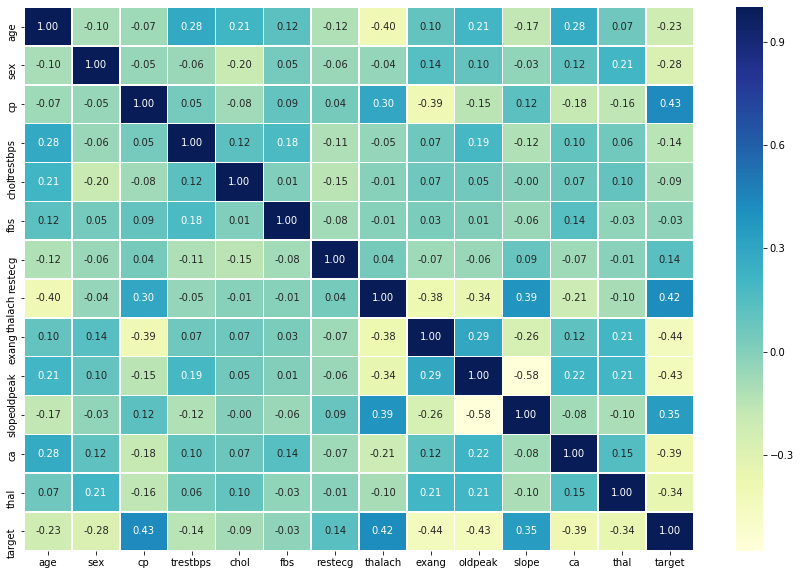

In [13]:
#plot a correlation matrix
corr_matrix=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### Modelling 

In [12]:
HD=heart_disease

In [13]:
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
#split the data into X and Y 
X=HD.drop("target",axis=1)
Y=HD["target"]

#Split the data into training and test set
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [24]:
X_train
#all columns but 3 rows (2-3-4)
X_train.iloc[2:5, 1:]

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
196,1,2,150,231,0,1,147,0,3.6,1,0,2
75,0,1,135,250,0,0,161,0,1.4,1,0,2
176,1,0,117,230,1,1,160,1,1.4,2,2,3


In [18]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

#### Trying different models

In [19]:
#put the models in a dictionary 
models={"Logistic regression": LogisticRegression(solver='lbfgs',max_iter=5000,multi_class="auto", C=1),
       "KNN": KNeighborsClassifier(n_neighbors=11),
       "Random forest": RandomForestClassifier(n_estimators=100)}

#Create a function that do the fitting and the evaluation of the models

def fit_and_score(models,X_train,X_test,Y_train,Y_test) :
    """
    fits and evaluates a ML model
    """
    np.random.seed(10)
    
    model_scores={}
    
    for name,model in models.items() :
        model.fit(X_train,Y_train)
        
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [20]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           Y_train=Y_train,
                           Y_test=Y_test)
model_scores

{'Logistic regression': 0.8852459016393442,
 'KNN': 0.7540983606557377,
 'Random forest': 0.8360655737704918}

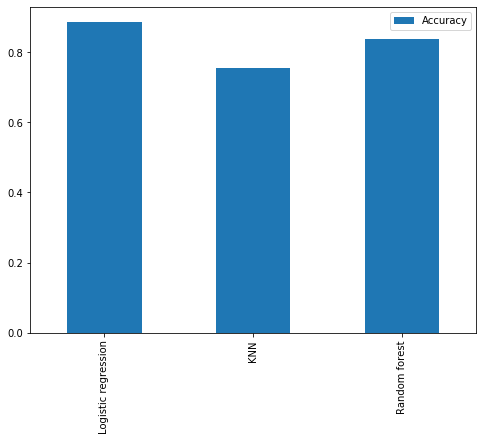

In [21]:
# Comparing the accuracy of our 3 models
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot(kind="bar",figsize=(8,6))

In [22]:
#Searching for the best number of n_neighbors
for i in range(5,21,1):
    print(f"trying model with {i} neighbors..")
    clf=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)   
    print(f"model accuracy on test set : {clf.score(X_test, Y_test)*100:.2f}%")

trying model with 5 neighbors..
model accuracy on test set : 68.85%
trying model with 6 neighbors..
model accuracy on test set : 72.13%
trying model with 7 neighbors..
model accuracy on test set : 70.49%
trying model with 8 neighbors..
model accuracy on test set : 68.85%
trying model with 9 neighbors..
model accuracy on test set : 68.85%
trying model with 10 neighbors..
model accuracy on test set : 70.49%
trying model with 11 neighbors..
model accuracy on test set : 75.41%
trying model with 12 neighbors..
model accuracy on test set : 73.77%
trying model with 13 neighbors..
model accuracy on test set : 73.77%
trying model with 14 neighbors..
model accuracy on test set : 73.77%
trying model with 15 neighbors..
model accuracy on test set : 68.85%
trying model with 16 neighbors..
model accuracy on test set : 72.13%
trying model with 17 neighbors..
model accuracy on test set : 68.85%
trying model with 18 neighbors..
model accuracy on test set : 68.85%
trying model with 19 neighbors..
model 

## Improving our model
### Tunning hyperparameters using `RandomizedSearchCV` for log-reg

In [23]:
#grid search dict
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}
#dict for rfc 
randomforest_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


In [24]:

np.random.seed(42)
#RSCV for logistic regression 
randomized_search_cv=RandomizedSearchCV(LogisticRegression(),
                                        param_distributions=log_reg_grid,
                                       cv=5,
                                       n_iter=20,
                                       verbose=True,
                                        iid=False,
                                        error_score=np.nan)

randomized_search_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid=False, n_iter=20, n_jobs=None,
                   param_distributions={'C': array([1...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [25]:
randomized_search_cv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
randomized_search_cv.best_score_

0.830494644666377

In [27]:
randomized_search_cv.score(X_test,Y_test)



0.8852459016393442

### Tunning hyperparameters using `RandomizedSearchCV` for RFC

In [28]:
np.random.seed(42)
RFC_randomized_search=RandomizedSearchCV(RandomForestClassifier(),
                                        param_distributions=rf_grid,
                                        cv=5,
                                        n_iter=20,
                                        verbose=True,
                                        iid=False)

RFC_randomized_search.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [29]:
RFC_randomized_search.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [30]:
RFC_randomized_search.best_score_

0.8429132291214358

In [31]:
RFC_randomized_search.score(X_test,Y_test)

0.8688524590163934

## Tuning hyperparameters with `GridSearchCV` for log-reg


In [32]:
#giving the solver a list to try on
solver_list = ['liblinear', 'newton-cg', 'lbfgs']
parameters = dict(solver=solver_list)
#defining our Model
lr = LogisticRegression(multi_class="auto", max_iter=5000)
"""
Grid search is an approach to parameter tuning that will methodically build and 
evaluate a model for each combination of algorithm parameters specified in a grid.
"""
clf = GridSearchCV(lr, parameters, cv=5,iid=False)
#fiting our model
clf.fit(X_train, Y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver, in zip(scores, solver_list):
    print(f"{solver}: {score:.3f}")

liblinear: 0.822
newton-cg: 0.814
lbfgs: 0.814


In [33]:
np.random.seed(42)
log_reg_grid={"solver":["liblinear"],
             "C":np.logspace(-4,4,20)}
log_Grid_search=GridSearchCV(LogisticRegression(),
                                        param_grid=log_reg_grid,
                                        cv=5,
                                       verbose=True
                                        )

log_Grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [34]:
log_Grid_search.best_score_

0.8305785123966942

In [35]:
log_Grid_search.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [36]:
log_Grid_search.score(X_test,Y_test)

0.8852459016393442

In [77]:
log_reg_grid={"solver":["liblinear"],
             "C":np.logspace(-4,4,30),
             "penalty":["l1","l2"]}
log_Grid_search=GridSearchCV(LogisticRegression(max_iter=1000),
                                        param_grid=log_reg_grid,
                                        cv=5,
                                       verbose=True,
                                        iid=False)

log_Grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [78]:
log_Grid_search.best_score_

0.8390866985091909

In [79]:
log_Grid_search.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [80]:
log_Grid_search.score(X_test,Y_test)

0.7704918032786885

In [116]:
# I tried to modify the parameters given by gridsearchCV 
model= LogisticRegression(solver='liblinear',max_iter=1000,multi_class="auto", C=0.23)
#
model.fit(X_train,Y_train)
#
model_scores=model.score(X_test,Y_test)
  

In [117]:
model_scores

0.8852459016393442

**area under ROC (receiver operating characteristic) curve or AUC**

**Definition** 
It tells how much model is capable of distinguishing between classes
* True positive (TP): correct positive prediction
* False positive (FP): incorrect positive prediction
* True negative (TN): correct negative prediction
* False negative (FN): incorrect negative prediction

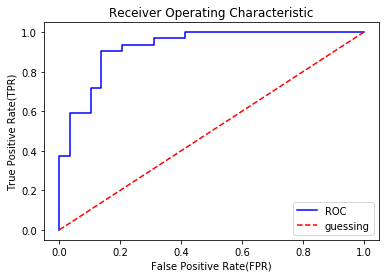

In [37]:

y_proba=log_Grid_search.predict_proba(X_test)
y_proba_positive=y_proba[:,1]
# calculate fpr, tpr, thresholds
fpr,tpr,thresholds=roc_curve(Y_test,y_proba_positive)
def plot_roc_curve(fpr,tpr) :
    """
    plots an ROC given the false positive rate(fpr)
    and true positive rate(tpr)
   """
#plot the ROC curve
plt.plot(fpr,tpr, color="blue",label="ROC")
#plot line with no predictive power(baseline)
plt.plot([0,1], [0,1], color="red", linestyle="--",label="guessing")
#customize our plot
plt.xlabel("False Positive Rate(FPR)") 
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic")
plt.legend()
#plt.legend(loc=4,ncol=2,title="AUC_Score",(roc_auc_score(Y_test,y_proba_positive)))

In [38]:
AUC=roc_auc_score(Y_test,y_proba_positive)
AUC

0.9245689655172414

### Confusion Matrix
* Definition :
 The confusion matrix shows the ways in which your classification model is confused when it makes predictions

In [60]:
pd.crosstab(Y_test, y_preds,rownames=["Actual Labels"], colnames=["Predicted Labels"]) 

Predicted Labels,0,1
Actual Labels,,
0,25,4
1,3,29


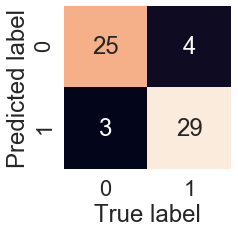

In [46]:
y_preds=log_Grid_search.predict(X_test)
conf_matrix=confusion_matrix(Y_test,y_preds)
sns.set(font_scale=2)
def plot_conf_mat(conf_matrix) :
  
  """
  plots a confusing matrix using seaborn heatmap. 
  """
fig, ax=plt.subplots(figsize=(3,3)) 
ax =sns.heatmap(conf_matrix, annot=True,cbar=False)
plt.xlabel("True label") 
plt.ylabel("Predicted label") ;
#fix the broken annotations
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plot_conf_mat(conf_matrix)

In [47]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [55]:
#link: https://muthu.co/understanding-the-classification-report-in-sklearn/
print("Precision score: {}".format(precision_score(Y_test,y_preds)))

Precision score: 0.8787878787878788
